In [1]:
import data_structure as ds
from data_structure import Gender
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.stats.power as smp
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [2]:
# df = ds.search_all()
df = ds.get_db('GPT')
df['gender_str'] = df['gender'].apply(lambda x: x.name)

In [3]:
m_mask = df['gender'] == Gender.Male
f_mask = df['gender'] == Gender.Female

df_male, df_female = df[m_mask], df[f_mask]

In [4]:
deserved_group_df = pd.concat(
                    [df_male.value_counts('deserved_salary').sort_index(),
                      df_female.value_counts('deserved_salary').sort_index()],
                        axis=1).reset_index()
deserved_group_df.replace(np.nan, 0, inplace=True)
deserved_group_df = deserved_group_df.apply(lambda x: x.astype(int), axis=1)
deserved_group_df.columns = ['salary',	'male', 'female']

current_group_df = pd.concat(
                    [df_male.value_counts('current_salary').sort_index(),
                     df_female.value_counts('current_salary').sort_index()],
                        axis=1).reset_index()
current_group_df.replace(np.nan, 0, inplace=True)
current_group_df = current_group_df.apply(lambda x: x.astype(int), axis=1)
current_group_df.columns = ['salary',	'male', 'female']

display(deserved_group_df)
display(current_group_df)

,salary,male,female
0,75,47,68
1,80,26,40
2,85,290,272
3,90,102,87
4,95,7,8
5,100,24,17
6,110,1,0
7,70,0,2


,salary,male,female
0,60,61,81
1,65,14,31
2,70,364,321
3,75,27,36
4,80,29,24
5,85,1,0
6,90,1,0
7,0,0,1


In [5]:
observed_deserved = deserved_group_df[['male', 'female']].to_numpy()

observed_current = current_group_df[['male', 'female']].to_numpy()

chi2_stat_deserved, p_val_deserved, dof_deserved, expected_deserved = stats.chi2_contingency(observed_deserved)
print(f"Deserved Salary Chi-square Test:\nChi2 Stat: {chi2_stat_deserved}, P-value: {p_val_deserved}, Degrees of Freedom: {dof_deserved}")

chi2_stat_current, p_val_current, dof_current, expected_current = stats.chi2_contingency(observed_current)
print(f"Current Salary Chi-square Test:\nChi2 Stat: {chi2_stat_current}, P-value: {p_val_current}, Degrees of Freedom: {dof_current}")

Deserved Salary Chi-square Test:
Chi2 Stat: 12.824292631206621, P-value: 0.07650696596066255, Degrees of Freedom: 7
Current Salary Chi-square Test:
Chi2 Stat: 16.686877289073703, P-value: 0.019530739169493983, Degrees of Freedom: 7


In [6]:
# Calculating the residuals
residuals = (observed_deserved - expected_deserved) / np.sqrt(expected_deserved)
print("Residuals:\n", residuals)

Residuals:
 [[-1.40552839  1.40978972]
 [-1.23406729  1.23780879]
 [ 0.48541493 -0.48688663]
 [ 0.74096786 -0.74321436]
 [-0.1905764   0.19115419]
 [ 0.75816753 -0.76046618]
 [ 0.70390156 -0.70603568]
 [-1.00151248  1.00454891]]


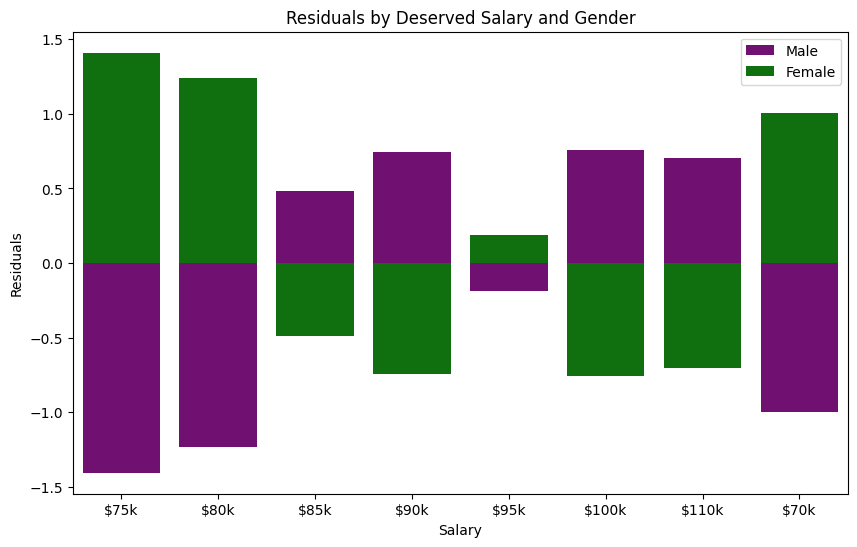

In [7]:
import seaborn as sns

ticks = [
    f'${salary}k' for salary in
    deserved_group_df['salary'].to_numpy()
    ]
male_residuals = residuals[:, 0]
female_residuals = residuals[:, 1]
plt.figure(figsize=(10, 6))
sns.barplot(x=ticks, y=male_residuals, color='purple', label='Male')
sns.barplot(x=ticks, y=female_residuals, color='green', label='Female')
plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residuals by Deserved Salary and Gender')
plt.legend()
plt.show()

In [8]:
total_men = deserved_group_df['male'].sum()
total_women = deserved_group_df['female'].sum()
proportions_men = [count / total_men for count in deserved_group_df['male']]
proportions_women = [count / total_women for count in deserved_group_df['female']]

print("Proportions of Men in Each Salary Category:", proportions_men)
print("Proportions of Women in Each Salary Category:", proportions_women)

Proportions of Men in Each Salary Category: [np.float64(0.09456740442655935), np.float64(0.052313883299798795), np.float64(0.5835010060362174), np.float64(0.2052313883299799), np.float64(0.014084507042253521), np.float64(0.0482897384305835), np.float64(0.002012072434607646), np.float64(0.0)]
Proportions of Women in Each Salary Category: [np.float64(0.13765182186234817), np.float64(0.08097165991902834), np.float64(0.5506072874493927), np.float64(0.17611336032388664), np.float64(0.016194331983805668), np.float64(0.03441295546558704), np.float64(0.0), np.float64(0.004048582995951417)]


In [9]:
deserved_group_df

,salary,male,female
0,75,47,68
1,80,26,40
2,85,290,272
3,90,102,87
4,95,7,8
5,100,24,17
6,110,1,0
7,70,0,2


In [10]:
from statsmodels.stats.proportion import proportions_ztest

nobs = np.array([total_men, total_women])
for count, (index, row) in zip(observed_deserved, deserved_group_df.iterrows()):
    stat, pval = proportions_ztest(count, nobs)
    print(f"\nSalary: {row['salary']}, Z-statistic: {stat}, P-value: {pval}")


Salary: 75, Z-statistic: -2.1173748381783812, P-value: 0.03422804793637907

Salary: 80, Z-statistic: -1.809164907268392, P-value: 0.07042538773518037

Salary: 85, Z-statistic: 1.0449479656541047, P-value: 0.29604701933843647

Salary: 90, Z-statistic: 1.1666010668434625, P-value: 0.24337151231903542

Salary: 95, Z-statistic: -0.2719909035774156, P-value: 0.785629013669928

Salary: 100, Z-statistic: 1.096764944932852, P-value: 0.27274415792818085

Salary: 110, Z-statistic: 0.9974807198723604, P-value: 0.31853122766989883

Salary: 70, Z-statistic: -1.419934787251684, P-value: 0.15562666720609653


In [11]:
from statsmodels.stats.power import zt_ind_solve_power
# Parameters
alpha = 0.05   # Significance level
power = 0.80   # Power of the test

for count, (index, row) in zip(observed_deserved, deserved_group_df.iterrows()):
    p1 = count[0]/total_men
    p2 = count[1]/total_women

    effect_size = abs(p1 - p2)

    # Calculate sample size per group
    sample_size = zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
    print(f"Required sample size for salary group {row['salary']}: {sample_size}")

Required sample size for salary group 75: 8456.607157543904
Required sample size for salary group 80: 19114.001695914776
Required sample size for salary group 85: 14508.104038319025
Required sample size for salary group 90: 18514.529826022608
Required sample size for salary group 95: 3526498.977985047
Required sample size for salary group 100: 81519.03212623103
Required sample size for salary group 110: 3877478.3710943605
Required sample size for salary group 70: 957702.2616269999


In [12]:
df.to_csv('salary_data.csv', index=False)